In [1]:
import numpy as np

import annotated_features as ann
import audio_features as aud

import discretemodel
import binarytemplates
import evalutation

import globals
import data_demo

## Creation of a hexagram model

To use hexagrams as templates for pattern matching of chord classes, they can be decomposed in discrete components. The model is built by incrementing the coefficients of each sub triangle for each chord matching with it.
A full model is composed by 5 hexagrams which correspond to each of the jazz5 chord qualities : maj, min, dom, hdim7, dim.

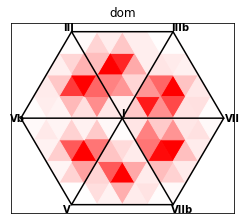

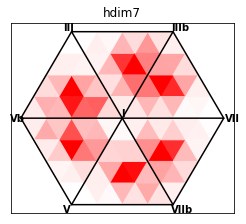

In [2]:
model = data_demo.model_resol2
#Plot separately the hexagrams of a model
discretemodel.print_model(model, ['dom', 'hdim7'])

In this model, the resolution value is 2. It means that in each ternary plot (one of the 6 triangles of the hexagram) there is 4^resolution = 16 sub triangles. Higher resolution can be used.

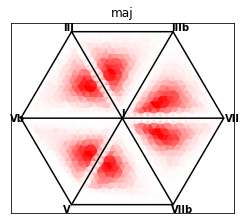

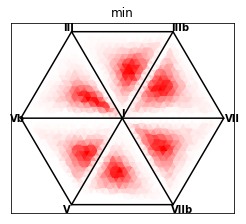

In [3]:
model_highresol = data_demo.model_resol4

discretemodel.print_model(model_highresol, ['maj','min'])

It is observed that chords labelled as 'maj' show a proper balance between the degrees I and III, I and V. The shape of the distributions with degree VII is different : the 'maj' class include major chords with or without major seventh.
Minor chords show the same balance between I and IIIb, I and V. In this case, the minor seventh (VIIb) can be involved.

A model can be trained with the following instructions. To avoid bias, it is important to normalize the model.

In [4]:
"""
#training with selected tracks
model = train(['../sounds/maple_leaf_rag(hyman).flac','../sounds/girl_from_ipanema.flac'],
              ['../json/maple_leaf_rag(hyman).json','../json/girl_from_ipanema.json'])
              
#training with the whole JAAH dataset
model = train(globals.track_list,
              globals.annotation_list)
"""
discretemodel.norm_hexagram(model)

Once a model is built, it can be used to predict the class of a chord - for a single beat or a whole track. Note that the parameters for the chroma features extraction have to be the same in both training and testing parts. A hexagram, corresponding to one of the 5 jazz5 qualities, is applied to the 12 possible roots. Scores are obtained for each of the 60 classes.

In [5]:
C_dom = [1, 0.1, 0.2, 0.1, 0.9, 0.3, 0.1, 0.8, 0.2, 0.1, 0.9, 0.1]

prediction = discretemodel.predict(C_dom, model)
print(prediction[:3])

[['C dom', 4.337043800238913e-10], ['C maj', 1.1975702128966246e-10], ['E dim', 1.0881525241606075e-10]]


In [6]:
chromagram, ground_truth = ann.info_track('../sounds/maple_leaf_rag(hyman).flac',
                                          '../json/maple_leaf_rag(hyman).json')

discretemodel.ACE_discrete(chromagram,
                           ground_truth,
                           model)

{'CSR': 33.68393023492117,
 'average rank': 8.722518086285621,
 'distance first': 1.4187042002666412,
 'three first': 52.08680993516115,
 'ten first': 65.73323420698257,
 'duration': 149.27}

To estimate the performance :
- CSR is computed, which corresponds to the proportion of perfect prediction, in duration (see https://www.music-ir.org/mirex/wiki/2019:Audio_Chord_Estimation for further details).
- The 'average rank' is the mean rank of ground truth chords in the ordered list of prediction (from 0 to 59).
- 'distance first' is an average distance between ground truth and predicted chord, based on tetrad representations of the jazz5 qualities. This distance is between 0 (same chord) and 4 (4 different notes). Taking two random chord of the JAAH dataset, the average distance between both is 2.60.

## Evaluation of the Audio Chord Estimation algorithm
To estimate the performance of such an ACE algorithm on the whole JAAH dataset, cross-validation is used.
In this project, the 113 tracks are divided in 5 different folders.

In [9]:
discretemodel.partition(113, 5)

[[96,
  108,
  82,
  20,
  73,
  6,
  27,
  21,
  3,
  23,
  103,
  64,
  19,
  68,
  14,
  12,
  59,
  55,
  106,
  104,
  69,
  61],
 [62,
  50,
  102,
  26,
  15,
  24,
  89,
  77,
  57,
  78,
  94,
  35,
  74,
  111,
  86,
  67,
  85,
  75,
  65,
  97,
  40,
  10,
  63],
 [93,
  22,
  38,
  81,
  7,
  107,
  88,
  41,
  8,
  17,
  5,
  34,
  91,
  60,
  46,
  47,
  56,
  9,
  79,
  43,
  45,
  84],
 [31,
  90,
  44,
  29,
  48,
  28,
  58,
  87,
  30,
  100,
  52,
  98,
  95,
  53,
  54,
  2,
  1,
  101,
  72,
  99,
  11,
  112,
  49],
 [18,
  92,
  32,
  71,
  76,
  33,
  105,
  110,
  0,
  16,
  25,
  36,
  4,
  70,
  66,
  51,
  109,
  80,
  37,
  83,
  13,
  39,
  42]]

A model is trained for each of these folders. The set of these 5 models is called premodel. To test one folder, the model used is computed by summing the models of the 4 other folders.
To train the pre_model with the 113 tracks of the JAAH dataset :

In [10]:
premodel = discretemodel.train_pre_model(
               globals.track_list,
               globals.annotation_list,
               data_demo.partition_a,
               resolution=2,
               verbose=False
           )

Finally, premodel is used in the function 'cross_validation', which returns the CSR, average rank, and distance of the first predicted for the whole duration of the dataset.

In [ ]:
"""
discretemodel.cross_validation(
    globals.track_list,
    globals.annotation_list,
    data_demo.partition_a,
    premodel,
    verbose=False
)
"""